In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
results_df = pd.read_csv('results_popv.csv')

In [4]:
# training_error and testing_error * 100 for model == KNN
if results_df.loc[results_df['model'] == 'KNN', 'training_error'].to_numpy()[0] < 1:
    results_df.loc[results_df['model'] == 'KNN', 'training_error'] = results_df.loc[results_df['model'] == 'KNN', 'training_error'] * 100
    results_df.loc[results_df['model'] == 'KNN', 'testing_error'] = results_df.loc[results_df['model'] == 'KNN', 'testing_error'] * 100

In [5]:
results_df

,Unnamed: 0,fold,model,accuracy,f1,recall,time,training_error,testing_error
0,0,0,Proto_Net+disto_pl,0.872004,0.870575,0.872004,364.958972,11.492408,12.799637
1,0,0,Proto_Net+disto,0.870606,0.869057,0.870606,332.015761,11.398487,12.939421
2,0,0,Proto_Net+pl,0.870965,0.868787,0.870965,1831.945116,11.297958,12.903530
3,0,0,Proto_Net,0.872457,0.871798,0.872457,2107.263618,11.225275,12.754302
4,0,0,Net,0.872438,0.870935,0.872438,360.001313,11.415950,12.756191
5,0,0,Logistic Regression,0.824949,0.822573,0.824949,2470.786714,16.853487,17.505053
6,0,0,KNN,0.861029,0.858677,0.861029,0.133970,9.761232,13.897127
7,0,1,Proto_Net+disto_pl,0.871021,0.869662,0.871021,356.221278,11.228579,12.897864
8,0,1,Proto_Net+disto,0.870398,0.870115,0.870398,328.780854,11.182326,12.960199
9,0,1,Proto_Net+pl,0.872665,0.871008,0.872665,2126.881185,11.027048,12.733523


In [6]:
results_df_for_plot = pd.DataFrame(columns=['model', 'fold', 'data', 'type'])
for i in range(results_df.shape[0]):
    results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['accuracy'][i], 'type': 'accuracy'}, ignore_index=True)
    results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['f1'][i], 'type': 'f1'}, ignore_index=True)
    results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['training_error'][i], 'type': 'training_error'}, ignore_index=True)
    results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['testing_error'][i], 'type': 'testing_error'}, ignore_index=True)

/var/folders/hk/lwlgjk2975n6fqbwkl1b7ny40000gq/T/ipykernel_36449/243587240.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['accuracy'][i], 'type': 'accuracy'}, ignore_index=True)
/var/folders/hk/lwlgjk2975n6fqbwkl1b7ny40000gq/T/ipykernel_36449/243587240.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_for_plot = results_df_for_plot.append({'model': results_df['model'][i], 'fold': results_df['fold'][i], 'data': results_df['f1'][i], 'type': 'f1'}, ignore_index=True)
/var/folders/hk/lwlgjk2975n6fqbwkl1b7ny40000gq/T/ipykernel_36449/243587240.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

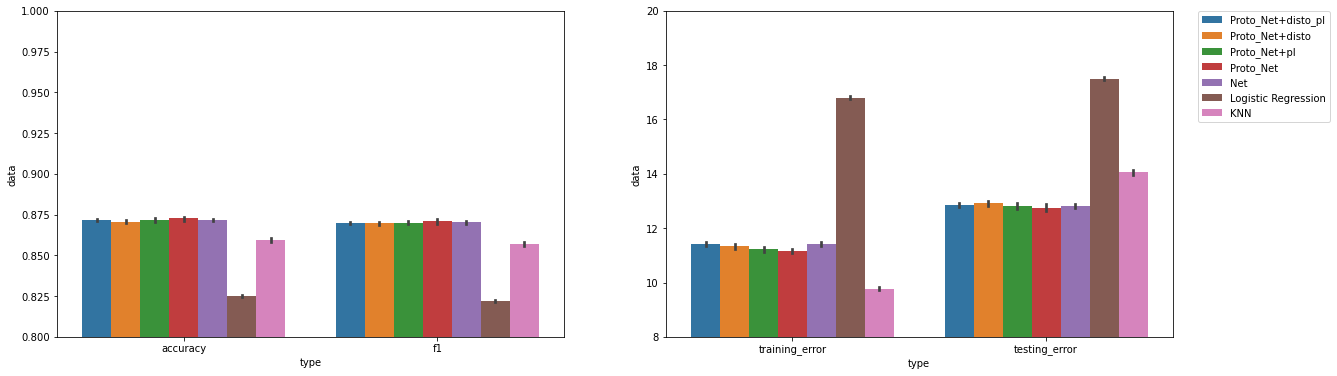

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(x='type', y='data', hue='model', data=results_df_for_plot[results_df_for_plot['type'].isin(['f1', 'accuracy'])], ax=ax1)
ax1.get_legend().remove()
ax1.set_ylim(0.8, 1)
sns.barplot(x='type', y='data', hue='model', data=results_df_for_plot[results_df_for_plot['type'].isin(['training_error', 'testing_error'])], ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_ylim(8, 20)
plt.show()

In [9]:
dist_df = pd.read_csv('dist_df_popv.csv')

In [10]:
# Group the dist_df by distance, model and fold, count the number
dist_df_grouped = dist_df.groupby(['distance', 'model']).size().reset_index(name='count')
dist_df_grouped_copy = dist_df_grouped.copy()

In [11]:
dist_df_grouped_nonzero = dist_df_grouped[dist_df_grouped['distance'] != 0]

In [12]:
# Calculate the weighted average of non-zero distance for each model
dist_df_grouped['weighted_average'] = dist_df_grouped['distance'] * dist_df_grouped['count']
dist_df_grouped = dist_df_grouped.groupby('model').sum().reset_index()
dist_df_grouped['weighted_average'] = dist_df_grouped['weighted_average'] / dist_df_grouped['count']

In [13]:
# Calculate the weighted average of non-zero distance for each model
dist_df_grouped_nonzero['weighted_average'] = dist_df_grouped_nonzero['distance'] * dist_df_grouped_nonzero['count']
dist_df_grouped_nonzero = dist_df_grouped_nonzero.groupby('model').sum().reset_index()
dist_df_grouped_nonzero['weighted_average'] = dist_df_grouped_nonzero['weighted_average'] / dist_df_grouped_nonzero['count']

In [14]:
dist_df_grouped

,model,distance,count,weighted_average
0,Net,55,264695,0.434651
1,knn,55,264695,0.472699
2,logistic,55,264695,0.540626
3,proto,55,264695,0.429049
4,proto_disto,55,264695,0.433257
5,proto_disto_pl,55,264695,0.428999
6,proto_pl,55,264695,0.430133


In [15]:
dist_df_grouped_nonzero

,model,distance,count,weighted_average
0,Net,55,33886,3.395207
1,knn,55,37217,3.361931
2,logistic,55,46306,3.090334
3,proto,55,33711,3.368841
4,proto_disto,55,34235,3.349817
5,proto_disto_pl,55,33986,3.341199
6,proto_pl,55,33911,3.357436


In [16]:
# all_models = ['Proto_Net+disto_pl', 'Proto_Net+disto', 'Proto_Net+pl', 'Proto_Net', 'Net', 'Logistic Regression', 'KNN']
all_models = ['proto_disto_pl', 'proto_pl', 'proto_disto', 'proto', 'Net', 'logistic', 'knn']

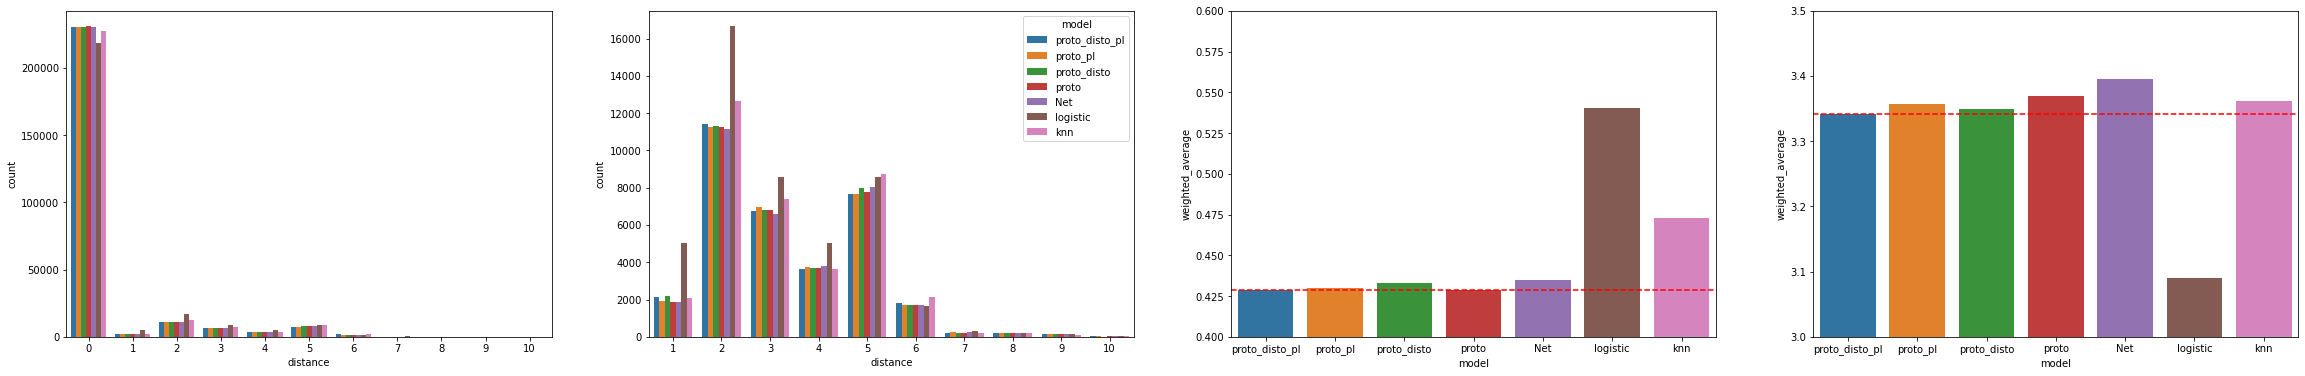

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(40, 6))
sns.barplot(x='distance', y='count', hue='model', data=dist_df_grouped_copy, hue_order=all_models, ax=ax1)
ax1.get_legend().remove()
sns.barplot(x='distance', y='count', hue='model', data=dist_df_grouped_copy[dist_df_grouped_copy['distance'] > 0], hue_order=all_models, ax=ax2)
# ax2.get_legend().remove()
sns.barplot(x='model', y='weighted_average', data=dist_df_grouped, order=all_models, ax=ax3)
ax3.set_ylim(0.4, 0.6)
ax3.axhline(y=dist_df_grouped.loc[dist_df_grouped['model'] == 'proto_disto_pl', 'weighted_average'].to_numpy()[0], color='r', linestyle='--')
# ax3.get_legend().remove()
sns.barplot(x='model', y='weighted_average', data=dist_df_grouped_nonzero, order=all_models, ax=ax4)
ax4.axhline(y=dist_df_grouped_nonzero.loc[dist_df_grouped_nonzero['model'] == 'proto_disto_pl', 'weighted_average'].to_numpy()[0], color='r', linestyle='--')
ax4.set_ylim(3, 3.5)
# ax4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()